# Dealing With Data

All notebooks should begin with code that imports modules, collections of built-in, commonly-used Python functions. Below we import a bunch of then, with the 
```python
import MODULE_NAME as MODULE_NICKNAME
```

syntax.

In [1]:
%matplotlib inline
import numpy as np # imports a fast numerical programming library
import scipy as sp # imports a statistical programming library
import matplotlib as mpl # imports the standard plotting library
import matplotlib.cm as cm # imports plotting colormaps
import matplotlib.pyplot as plt # imports the MATLAB compatible plotting API
import pandas as pd # imports a library to handle data as dataframes
import seaborn.apionly as sns

/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


In [4]:
3.14159*(.5)*(.5)

0.7853975

## Variables and Functions

Let us create a list of numbers:

In [8]:
a = [1.0, 2, 3.0]
print(type(a[0]))

<class 'float'>


Now we can do some usual statistical stuff, using built-in functions

In [9]:
len(a)

3

In [10]:
np.mean(a)

2.0

In [11]:
np.std(a)

0.816496580927726

Think of a variable as a label for a value, not a box in which you put the value

![](images/sticksnotboxes.png)

(image taken from Fluent Python by Luciano Ramalho)

In [12]:
b = a
b

[1.0, 2, 3.0]

This DOES NOT create a new copy of a. It merely puts a new label on the memory at a, as can be seen by the following code:

In [13]:
a[1] = 2.0

In [14]:
a, b

([1.0, 2.0, 3.0], [1.0, 2.0, 3.0])

Multiple items on one line in the interface are returned as a tuple, an immutable sequence of Python objects.

## Lists

Above you saw an example of indexing on lists: `a[1]`. You will have noticed that the second element is indexed as 1. This is because python idexes start at 0.

In [21]:
float_list = [1., 3., 5., 4., 2.]

Python has some pretty snazzy indexing:

In [19]:
print(float_list[1:5:2]) #third number in this case tells to take every second value
print(float_list[0:2])

[3.0, 4.0]
[1.0, 3.0]


In [24]:
float_list[-3:-1]

[5.0, 4.0]

Here is a key for some of the indexing operations:

![](images/ops3_v2.png)

We can iterate through a list using a loop. Here's a for loop.

In [25]:
for ele in float_list:
    print(ele)

1.0
3.0
5.0
4.0
2.0


What if you wanted the index as well?

Python has other useful functions such as enumerate, which can be used to create a list of tuples with each tuple of the form (index, value).

In [26]:
for i, ele in enumerate(float_list):
    print(i,ele)

0 1.0
1 3.0
2 5.0
3 4.0
4 2.0


Another construct, like `enumerate`, is zip. It combines lists together

In [31]:
int_list = [1, 2, 3, 4, 5]
zip(int_list, float_list)

To materialize it, you must wrap in a for loop

In [32]:
for i, f in zip(int_list, float_list):
    print(i, f)

1 1.0
2 3.0
3 5.0
4 4.0
5 2.0


In [33]:
assert(len(int_list)==5)

And you can do multiple:

In [34]:
char_list = ['a', 'b', 'c', 'd', 'e']
for i, f, c in zip(int_list, float_list, char_list):
    print(i, f, c)

1 1.0 a
2 3.0 b
3 5.0 c
4 4.0 d
5 2.0 e


Lists can be constructed in a compact way using a list comprehension. Here's a simple example.

In [35]:
squaredlist = [i*i for i in float_list]
squaredlist

[1.0, 9.0, 25.0, 16.0, 4.0]

You can mix in conditions:

In [36]:
comp_list1 = [2*i for i in squaredlist if i % 2 == 0]
print(comp_list1)

[32.0, 8.0]


This is probably a good point to show you the operators Python has:

![](images/ops1_v2.png)

and the comparison operator you can use in conditionals:

![](images/ops2_v2.png)

The list comprehension above can be constructed by combining for loops and conditionals:

In [37]:
comp_list2 = []
for i in squaredlist:
    if i % 2 == 0:
        comp_list2.append(2*i)
        
comp_list2

[32.0, 8.0]

Indeed, a list comprehension is just "syntactic sugar" for the above.

## Dictionaries

A dictionary is another storage container. Like a list, a dictionary is a sequence of items. Unlike a list, a dictionary is unordered and its items are accessed with keys and not integer positions.

Dictionaries are the closest container we have to a database.

Here is a dictionary which gives us state names when looked up by their abbreviations.

(We are sneakily getting to see some Python strings as well)

In [38]:
#this mapping between states and abbreviations will come in handy later
states_abbrev = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}


In [39]:
states_abbrev.keys()

dict_keys(['AK', 'AL', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 'NA', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV', 'WY'])

In [40]:
states_abbrev.values()

dict_values(['Alaska', 'Alabama', 'Arkansas', 'American Samoa', 'Arizona', 'California', 'Colorado', 'Connecticut', 'District of Columbia', 'Delaware', 'Florida', 'Georgia', 'Guam', 'Hawaii', 'Iowa', 'Idaho', 'Illinois', 'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Massachusetts', 'Maryland', 'Maine', 'Michigan', 'Minnesota', 'Missouri', 'Northern Mariana Islands', 'Mississippi', 'Montana', 'National', 'North Carolina', 'North Dakota', 'Nebraska', 'New Hampshire', 'New Jersey', 'New Mexico', 'Nevada', 'New York', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Virginia', 'Virgin Islands', 'Vermont', 'Washington', 'Wisconsin', 'West Virginia', 'Wyoming'])

In [41]:
states_abbrev.items()

dict_items([('AK', 'Alaska'), ('AL', 'Alabama'), ('AR', 'Arkansas'), ('AS', 'American Samoa'), ('AZ', 'Arizona'), ('CA', 'California'), ('CO', 'Colorado'), ('CT', 'Connecticut'), ('DC', 'District of Columbia'), ('DE', 'Delaware'), ('FL', 'Florida'), ('GA', 'Georgia'), ('GU', 'Guam'), ('HI', 'Hawaii'), ('IA', 'Iowa'), ('ID', 'Idaho'), ('IL', 'Illinois'), ('IN', 'Indiana'), ('KS', 'Kansas'), ('KY', 'Kentucky'), ('LA', 'Louisiana'), ('MA', 'Massachusetts'), ('MD', 'Maryland'), ('ME', 'Maine'), ('MI', 'Michigan'), ('MN', 'Minnesota'), ('MO', 'Missouri'), ('MP', 'Northern Mariana Islands'), ('MS', 'Mississippi'), ('MT', 'Montana'), ('NA', 'National'), ('NC', 'North Carolina'), ('ND', 'North Dakota'), ('NE', 'Nebraska'), ('NH', 'New Hampshire'), ('NJ', 'New Jersey'), ('NM', 'New Mexico'), ('NV', 'Nevada'), ('NY', 'New York'), ('OH', 'Ohio'), ('OK', 'Oklahoma'), ('OR', 'Oregon'), ('PA', 'Pennsylvania'), ('PR', 'Puerto Rico'), ('RI', 'Rhode Island'), ('SC', 'South Carolina'), ('SD', 'South Dak

In [42]:
for key, value in states_abbrev.items():
    print("The state for abbreviation {} is {}.".format(key, value))

The state for abbreviation AK is Alaska.
The state for abbreviation AL is Alabama.
The state for abbreviation AR is Arkansas.
The state for abbreviation AS is American Samoa.
The state for abbreviation AZ is Arizona.
The state for abbreviation CA is California.
The state for abbreviation CO is Colorado.
The state for abbreviation CT is Connecticut.
The state for abbreviation DC is District of Columbia.
The state for abbreviation DE is Delaware.
The state for abbreviation FL is Florida.
The state for abbreviation GA is Georgia.
The state for abbreviation GU is Guam.
The state for abbreviation HI is Hawaii.
The state for abbreviation IA is Iowa.
The state for abbreviation ID is Idaho.
The state for abbreviation IL is Illinois.
The state for abbreviation IN is Indiana.
The state for abbreviation KS is Kansas.
The state for abbreviation KY is Kentucky.
The state for abbreviation LA is Louisiana.
The state for abbreviation MA is Massachusetts.
The state for abbreviation MD is Maryland.
The 

## Dataframes with Pandas

For reference, here is a useful [pandas cheat sheet](https://drive.google.com/folderview?id=0ByIrJAE4KMTtaGhRcXkxNHhmY2M&usp=sharing).

Often data is stored in comma separated values (CSV) files. CSV files can be output by any spreadsheet software, and are plain text, hence are a great way to share data.

Here we are reading in a spreadsheet of the number of electoral votes in the American Electoral College.

In [43]:
electoral_votes = pd.read_csv("data/electoral_votes.csv")
electoral_votes.head()

,State,Votes
0,California,55
1,Texas,38
2,New York,29
3,Florida,29
4,Illinois,20


The actual file looks something like this:

```
State,Votes
California,55
Texas,38
New York,29
Florida,29
Illinois,20
Pennsylvania,20
```
You can see that an index has been added, and its numerical, and starts at 0 (like in the lists). This index is not particularly useful, so lets set the state column as the index.

In [44]:
electoral_votes = electoral_votes.set_index('State')
electoral_votes.head()

,Votes
State,
California,55
Texas,38
New York,29
Florida,29
Illinois,20


Notice how we used the `electoral_votes` variable twice in a line above. Pandas returns new objects in memory when we do something to a dataframe (here, setting the index). We relabel the new memory with the same label.

What happens to the old memory? When nothing refers to it, Python "garbage collects" it.

Let us load up another csv file. Gallup measures the political leaning of each state, based on asking random people which party they identify or affiliate with. [Here's the data](http://www.gallup.com/poll/156437/heavily-democratic-states-concentrated-east.aspx#2) they collected from January-June of 2012:

In [45]:
gallup_2012=pd.read_csv("data/g12.csv").set_index('State')
gallup_2012.head()

,Democrat,Republican,Dem_Adv,N
State,,,,
Alabama,36.0,49.6,-13.6,3197
Alaska,35.9,44.3,-8.4,402
Arizona,39.8,47.3,-7.5,4325
Arkansas,41.5,40.8,0.7,2071
California,48.3,34.6,13.7,16197


What we have now is a spreadsheet with indexed rows and named columns, called a dataframe in pandas.  `gallup_2012` is an instance of the pd.DataFrame class, created by calling the pd.read_csv "constructor function".

`gallup_2012` is a dataframe object, and it has methods (functions) belonging to it. For example, `gallup_2012.head()` is a method that shows the first 5 rows of the dataframe.

A pandas dataframe is a set of columns pasted together into a spreadsheet, as shown in the schematic below, which is taken from the cheatsheet above. The columns in pandas are called series objects.

![](images/pandastruct.png)

Lets construct a new series of this data, people who said they would not vote republican or democrat:

In [46]:
vote_for_others = 100 - gallup_2012.Democrat - gallup_2012.Republican
vote_for_others

State
Alabama                 14.4
Alaska                  19.8
Arizona                 12.9
Arkansas                17.7
California              17.1
Colorado                15.0
Connecticut             15.8
Delaware                16.4
District of Columbia     8.3
Florida                 14.7
Georgia                 15.4
Hawaii                  17.0
Idaho                   14.7
Illinois                15.8
Indiana                 15.3
Iowa                    15.4
Kansas                  14.3
Kentucky                13.4
Louisiana               14.6
Maine                   16.8
Maryland                12.2
Massachusetts           14.1
Michigan                15.7
Minnesota               13.4
Mississippi             12.8
Missouri                15.9
Montana                 14.5
Nebraska                14.8
Nevada                  17.4
New Hampshire           13.9
New Jersey              16.7
New Mexico              14.2
New York                17.2
North Carolina          13.4
North Da

In [47]:
type(vote_for_others)

pandas.core.series.Series

Now lets paste this series into our dataframe:

In [48]:
gallup_2012["Unknown"] = vote_for_others
gallup_2012.head()

,Democrat,Republican,Dem_Adv,N,Unknown
State,,,,,
Alabama,36.0,49.6,-13.6,3197,14.4
Alaska,35.9,44.3,-8.4,402,19.8
Arizona,39.8,47.3,-7.5,4325,12.9
Arkansas,41.5,40.8,0.7,2071,17.7
California,48.3,34.6,13.7,16197,17.1


Each row lists a state, the percent of surveyed individuals who identify as Democrat/Republican, the percent whose identification is unknown or who haven't made an affiliation yet, the margin between Democrats and Republicans (`Dem_Adv`: the percentage identifying as Democrats minus the percentage identifying as Republicans), and the number `N` of people surveyed, and now this new `Unknown` column.

We now have two dataframes with state names as an index. Lets **join** these to produce a wider one with all the data we have. This is identical to a SQL inner join.

In [50]:
combined = gallup_2012.join(electoral_votes)
combined.head()

,Democrat,Republican,Dem_Adv,N,Unknown,Votes
State,,,,,,
Alabama,36.0,49.6,-13.6,3197,14.4,9
Alaska,35.9,44.3,-8.4,402,19.8,3
Arizona,39.8,47.3,-7.5,4325,12.9,11
Arkansas,41.5,40.8,0.7,2071,17.7,6
California,48.3,34.6,13.7,16197,17.1,55


In [51]:
combined.to_csv("data/cleanedgallup.csv")

We can construct sub-dataframes by using an array-like indexing syntax

In [52]:
combined[['Dem_Adv', 'Votes']].head()

,Dem_Adv,Votes
State,,
Alabama,-13.6,9
Alaska,-8.4,3
Arizona,-7.5,11
Arkansas,0.7,6
California,13.7,55


You can make simple plots very easily with pandas:

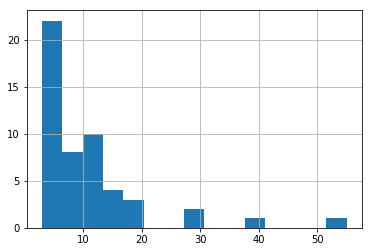

In [53]:
combined.Votes.hist(bins=15);

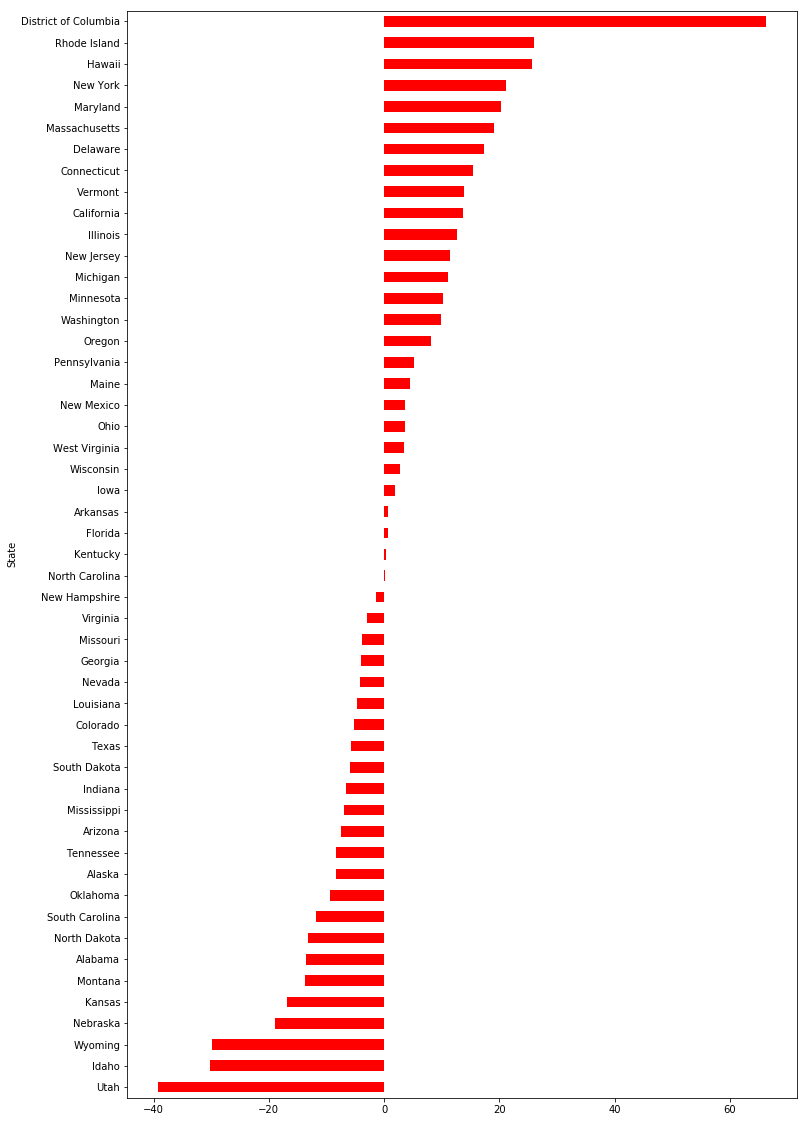

In [54]:
plt.figure(figsize=(12, 20))
combined.sort_values('Dem_Adv')['Dem_Adv'].plot(kind="barh", color="r");

What exactly is in a Pandas Series? Lets see:

In [55]:
votes_array = combined.Votes.values
votes_array

array([ 9,  3, 11,  6, 55,  9,  7,  3,  3, 29, 16,  4,  4, 20, 11,  6,  6,
        8,  8,  4, 10, 11, 16, 10,  6, 10,  3,  5,  6,  4, 14,  5, 29, 15,
        3, 18,  7,  7, 20,  4,  9,  3, 11, 38,  6,  3, 13, 12,  5, 10,  3])

In [56]:
type(votes_array), votes_array.dtype

(numpy.ndarray, dtype('int64'))

This is a special kind of list called a `numpy array`. Unlike regular python lists, the items in here are all of one type, 64 bit integers. This allows python to allocate memory contiguously for the array, as it knows what to expect. This particular array is 1-dimensional.

In [57]:
votes_array.shape

(51,)

If you get `values` from a dataframe, you get a 2-D array!

In [58]:
array_2d = combined[['Dem_Adv', 'Votes']].values
array_2d

array([[-13.6,   9. ],
       [ -8.4,   3. ],
       [ -7.5,  11. ],
       [  0.7,   6. ],
       [ 13.7,  55. ],
       [ -5.2,   9. ],
       [ 15.4,   7. ],
       [ 17.4,   3. ],
       [ 66.3,   3. ],
       [  0.7,  29. ],
       [ -4. ,  16. ],
       [ 25.6,   4. ],
       [-30.3,   4. ],
       [ 12.6,  20. ],
       [ -6.7,  11. ],
       [  1.8,   6. ],
       [-16.9,   6. ],
       [  0.4,   8. ],
       [ -4.8,   8. ],
       [  4.4,   4. ],
       [ 20.2,  10. ],
       [ 19.1,  11. ],
       [ 11.1,  16. ],
       [ 10.2,  10. ],
       [ -7. ,   6. ],
       [ -3.9,  10. ],
       [-13.7,   3. ],
       [-19. ,   5. ],
       [ -4.2,   6. ],
       [ -1.5,   4. ],
       [ 11.5,  14. ],
       [  3.6,   5. ],
       [ 21.2,  29. ],
       [  0.2,  15. ],
       [-13.2,   3. ],
       [  3.6,  18. ],
       [ -9.4,   7. ],
       [  8.1,   7. ],
       [  5.2,  20. ],
       [ 26. ,   4. ],
       [-11.9,   9. ],
       [ -6. ,   3. ],
       [ -8.4,  11. ],
       [ -5

Notice that the electoral votes got co-erced to floats

In [59]:
type(array_2d), array_2d.shape, array_2d.dtype

(numpy.ndarray, (51, 2), dtype('float64'))

## JSON file format

```
{"type":"FeatureCollection","features":[
{"type":"Feature","id":"AL","properties":{"name":"Alabama"},"geometry":{"type":"Polygon","coordinates":[[[-87.359296,35.00118],[-85.606675,34.984749],
[-85.431413,34.124869],[-85.184951,32.859696],[-85.069935,32.580372],[-84.960397,32.421541],
[-85.004212,32.322956],[-84.889196,32.262709],[-85.058981,32.13674],[-85.053504,32.01077],
[-85.141136,31.840985],[-85.042551,31.539753],[-85.113751,31.27686],[-85.004212,31.003013],
[-85.497137,30.997536],[-87.600282,30.997536],[-87.633143,30.86609],[-87.408589,30.674397],
[-87.446927,30.510088],[-87.37025,30.427934],[-87.518128,30.280057],[-87.655051,30.247195],
[-87.90699,30.411504],[-87.934375,30.657966],[-88.011052,30.685351],[-88.10416,30.499135],
[-88.137022,30.318396],[-88.394438,30.367688],[-88.471115,31.895754],[-88.241084,33.796253],
[-88.098683,34.891641],[-88.202745,34.995703],[-87.359296,35.00118]]]}},
{"type":"Feature","id":"AK","properties":{"name":"Alaska"},"geometry":{"type":"M
```

This is an often used file format on the web. Here we have US State shapefiles in JSON. It maps to a python dictionary. We use a context manager (`with`) to open this file and load json data. The context manager makes sure the file gets closed.

In [60]:
import json
with open("data/us-states.json") as fd: # makes sure file is closed.
    data = json.load(fd)

In [61]:
data.keys()
data['features'][0]

{'type': 'Feature',
 'id': 'AL',
 'properties': {'name': 'Alabama'},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-87.359296, 35.00118],
    [-85.606675, 34.984749],
    [-85.431413, 34.124869],
    [-85.184951, 32.859696],
    [-85.069935, 32.580372],
    [-84.960397, 32.421541],
    [-85.004212, 32.322956],
    [-84.889196, 32.262709],
    [-85.058981, 32.13674],
    [-85.053504, 32.01077],
    [-85.141136, 31.840985],
    [-85.042551, 31.539753],
    [-85.113751, 31.27686],
    [-85.004212, 31.003013],
    [-85.497137, 30.997536],
    [-87.600282, 30.997536],
    [-87.633143, 30.86609],
    [-87.408589, 30.674397],
    [-87.446927, 30.510088],
    [-87.37025, 30.427934],
    [-87.518128, 30.280057],
    [-87.655051, 30.247195],
    [-87.90699, 30.411504],
    [-87.934375, 30.657966],
    [-88.011052, 30.685351],
    [-88.10416, 30.499135],
    [-88.137022, 30.318396],
    [-88.394438, 30.367688],
    [-88.471115, 31.895754],
    [-88.241084, 33.796253],
    [-88.098683, 34.8

In [62]:
data['features'][1]

{'type': 'Feature',
 'id': 'AK',
 'properties': {'name': 'Alaska'},
 'geometry': {'type': 'MultiPolygon',
  'coordinates': [[[[-131.602021, 55.117982],
     [-131.569159, 55.28229],
     [-131.355558, 55.183705],
     [-131.38842, 55.01392],
     [-131.645836, 55.035827],
     [-131.602021, 55.117982]]],
   [[[-131.832052, 55.42469],
     [-131.645836, 55.304197],
     [-131.749898, 55.128935],
     [-131.832052, 55.189182],
     [-131.832052, 55.42469]]],
   [[[-132.976733, 56.437924],
     [-132.735747, 56.459832],
     [-132.631685, 56.421493],
     [-132.664547, 56.273616],
     [-132.878148, 56.240754],
     [-133.069841, 56.333862],
     [-132.976733, 56.437924]]],
   [[[-133.595627, 56.350293],
     [-133.162949, 56.317431],
     [-133.05341, 56.125739],
     [-132.620732, 55.912138],
     [-132.472854, 55.780691],
     [-132.4619, 55.671152],
     [-132.357838, 55.649245],
     [-132.341408, 55.506844],
     [-132.166146, 55.364444],
     [-132.144238, 55.238474],
     [-132.02

In [63]:
data['features'][0]['geometry']['coordinates']

[[[-87.359296, 35.00118],
  [-85.606675, 34.984749],
  [-85.431413, 34.124869],
  [-85.184951, 32.859696],
  [-85.069935, 32.580372],
  [-84.960397, 32.421541],
  [-85.004212, 32.322956],
  [-84.889196, 32.262709],
  [-85.058981, 32.13674],
  [-85.053504, 32.01077],
  [-85.141136, 31.840985],
  [-85.042551, 31.539753],
  [-85.113751, 31.27686],
  [-85.004212, 31.003013],
  [-85.497137, 30.997536],
  [-87.600282, 30.997536],
  [-87.633143, 30.86609],
  [-87.408589, 30.674397],
  [-87.446927, 30.510088],
  [-87.37025, 30.427934],
  [-87.518128, 30.280057],
  [-87.655051, 30.247195],
  [-87.90699, 30.411504],
  [-87.934375, 30.657966],
  [-88.011052, 30.685351],
  [-88.10416, 30.499135],
  [-88.137022, 30.318396],
  [-88.394438, 30.367688],
  [-88.471115, 31.895754],
  [-88.241084, 33.796253],
  [-88.098683, 34.891641],
  [-88.202745, 34.995703],
  [-87.359296, 35.00118]]]

With an idea of the structure of the JSON file, we can now iterate over the "Features":

In [64]:
#adapted from  https://github.com/dataiap/dataiap/blob/master/resources/util/map_util.py

#load in state geometry
from collections import defaultdict 
state2poly = defaultdict(list) # a dictionary where every value is an empty list


for f in data['features']:
    state = states_abbrev[f['id']] #use our old dictionary to map to a state name
    geo = f['geometry']
    if geo['type'] == 'Polygon':
        for coords in geo['coordinates']:
            state2poly[state].append(coords)
    elif geo['type'] == 'MultiPolygon':
        for polygon in geo['coordinates']:
            state2poly[state].extend(polygon)

In [65]:
state2poly['Alabama']

[[[-87.359296, 35.00118],
  [-85.606675, 34.984749],
  [-85.431413, 34.124869],
  [-85.184951, 32.859696],
  [-85.069935, 32.580372],
  [-84.960397, 32.421541],
  [-85.004212, 32.322956],
  [-84.889196, 32.262709],
  [-85.058981, 32.13674],
  [-85.053504, 32.01077],
  [-85.141136, 31.840985],
  [-85.042551, 31.539753],
  [-85.113751, 31.27686],
  [-85.004212, 31.003013],
  [-85.497137, 30.997536],
  [-87.600282, 30.997536],
  [-87.633143, 30.86609],
  [-87.408589, 30.674397],
  [-87.446927, 30.510088],
  [-87.37025, 30.427934],
  [-87.518128, 30.280057],
  [-87.655051, 30.247195],
  [-87.90699, 30.411504],
  [-87.934375, 30.657966],
  [-88.011052, 30.685351],
  [-88.10416, 30.499135],
  [-88.137022, 30.318396],
  [-88.394438, 30.367688],
  [-88.471115, 31.895754],
  [-88.241084, 33.796253],
  [-88.098683, 34.891641],
  [-88.202745, 34.995703],
  [-87.359296, 35.00118]]]

In [ ]:
state2poly['Alaska']

## Functions

A function object is a reusable block of code that does a specific task. Functions are all over Python, either on their own or on other objects. To invoke a function func, you call it as func(arguments).

We've seen built-in Python functions and methods. For example, `len` and `print` are built-in Python functions. When you called `np.mean` to calculate the mean of three numbers, there `mean` is a function in the numpy module and numpy was abbreviated as `np`. This syntax allow us to have multiple "mean" functions in different modules; calling this one as `np.mean` guarantees that we will pick up numpy's `mean` function, as opposed to a `mean` function from a different module.

In [66]:
np.mean([1,2,3])

2.0

A function that belongs to an object is called a method. An example of this is append on an existing list. In other words, a method is a function on an instance of a type of object (also called class, in this case, list type).

In [67]:
new_float_list = [1.0, 2.09, 4.0, 2.0, 0.444]
new_float_list.append(56.7) 
new_float_list

[1.0, 2.09, 4.0, 2.0, 0.444, 56.7]

We'll now learn to write our own user-defined functions. Below is the syntax for defining a basic function with one input argument and one output. You can also define functions with no input or output arguments, or multiple input or output arguments.

```
def name_of_function(arg):
    ...
    return(output)
```



In [68]:
def square(x):
    x_sqr = x*x
    return(x_sqr)
square(3)

9

In [83]:
def square_and_cube(x):
    x_cub = x*x*x
    x_sqr = x*x
    return(x_sqr, x_cub)

y = int(input("Enter Number:"))

square_and_cube(y)

Enter Number:45


(2025, 91125)

Often we quickly define mathematical functions with a one-line function called a lambda function. Lambda functions are great because they enable us to write functions without having to name them, ie, they're anonymous.
No return statement is needed.

In [80]:
square = lambda x: x*x
print(square(3))


hypotenuse = lambda x, y: x*x + y*y

## Same as

# def hypotenuse(x, y):
#     return(x*x + y*y)

hypotenuse(3,4)

9


25

Functions may also have default argument values. Functions with default values are used extensively in many libraries. The default values are assigned when the function is defined.

In [81]:
# This function can be called with x and y, in which case it will return x*y;
# or it can be called with x only, in which case it will return x*1.
def get_multiple(x, y=1):
    return x, y, x*y

print("With x and y:", get_multiple(10, 2))
print("With x only:", get_multiple(10))

With x and y: (10, 2, 20)
With x only: (10, 1, 10)


## An application of functions to plotting

In [84]:
def draw_state(ax, stateid, **kwargs):
    """
    draw_state(ax, stateid, color=..., **kwargs)

    Automatically draws a filled shape representing the state in
    subplot.
    The color keyword argument specifies the fill color.  It accepts keyword
    arguments that plot() accepts
    """
    for polygon in state2poly[stateid]:
        xs, ys = zip(*polygon)
        ax.plot(xs, ys, 'k', lw=1)
        ax.fill(xs, ys, **kwargs)

        
def make_map(states, label, figsize=(12, 9)):
    """
    Draw a cloropleth map, that maps data onto the United States

    Inputs
    -------
    states : Column of a DataFrame
        The value for each state, to display on a map
    label : str
        Label of the color bar

    Returns
    --------
    The map
    """
    fig = plt.figure(figsize=figsize) # create a figure
    ax = plt.gca() # get axes from the figure

    if states.max() < 2: # colormap for election probabilities   
        cmap = cm.RdBu
        vmin, vmax = 0, 1
    else:  # colormap for electoral votes, or other values
        cmap = cm.binary
        vmin, vmax = states.min(), states.max()
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

    skip = set(['National', 'District of Columbia', 'Guam', 'Puerto Rico',
                'Virgin Islands', 'American Samoa', 'Northern Mariana Islands'])

    for state in states_abbrev.values():
        if state in skip:
            continue
        color = cmap(norm(states.loc[state]))
        draw_state(ax, state, color = color)

    #add an inset colorbar
    ax1 = fig.add_axes([0.45, 0.70, 0.4, 0.02])    
    cb1=mpl.colorbar.ColorbarBase(ax1, cmap=cmap,
                                  norm=norm,
                                  orientation='horizontal')
    ax1.set_title(label)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(-180, -60)
    ax.set_ylim(15, 75)
    sns.despine(left=True, bottom=True)
    return ax

We plot a map of these probabilities as before, run the simulation, and display the results

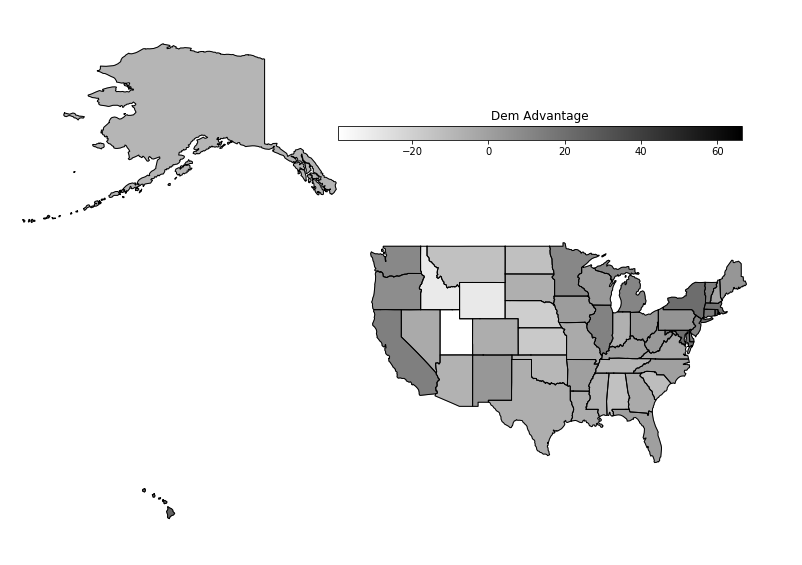

In [85]:
make_map(combined.Dem_Adv, "Dem Advantage", figsize=(14, 10));